In [180]:
import numpy as np
import matplotlib.pyplot as plt
from numpy.linalg import *
from matplotlib.cm import jet
import pandas as pd

plt.rcParams["figure.figsize"] = [14, 8]
plt.rcParams["font.size"] = 20
plt.style.use(["dark_background"])

# plt.rcParams.keys()

# Importing the data, part b

y = columns: y_0, y_1,...,y_15
Y = rows: Y_0, Y_1,...,Y_1000
A = (Y_0, Y_1, Y_2,...,Y_1000)

In [3]:
def data_loader():
    samples = pd.read_csv("csv-map/samples.csv", delimiter=",")
    train_data = pd.read_csv("csv-map/train_ts.csv", delimiter=",")
    theta = samples.to_numpy()
    X = train_data.to_numpy()
    return X, theta 

X, theta = data_loader()
X.shape, theta.shape

((9999, 201), (9999, 15))

$\mathbf{X}$ is the training data $(9999, 201)$ and $\mathbf{\theta}$ is the targets $(9999,15)$.
Our goal is to find the parameters $\mathbf{W}$, a $(15, 201)$ matrix such that the $l_2$-norm is minimized.\
Let's try with least-squares-method for the following equation:
$$\mathbf{\theta W} = \mathbf{X}$$
We get \
$$
\mathbf{W} = (\mathbf{\theta^\dagger \theta})^{-1} \mathbf{\theta^\dagger X}$$

## Exploring the data

In [4]:
alpha_a, alpha_ap, alpha_r, alpha_rp, beta_a, beta_r, delta_ma, delta_mr, delta_a, delta_r, gamma_a, gamma_r, gamma_c, theta_a, theta_r = theta.T

(Text(0, 0.5, 'uniform sample range'), Text(0.5, 0, 'sample size'))

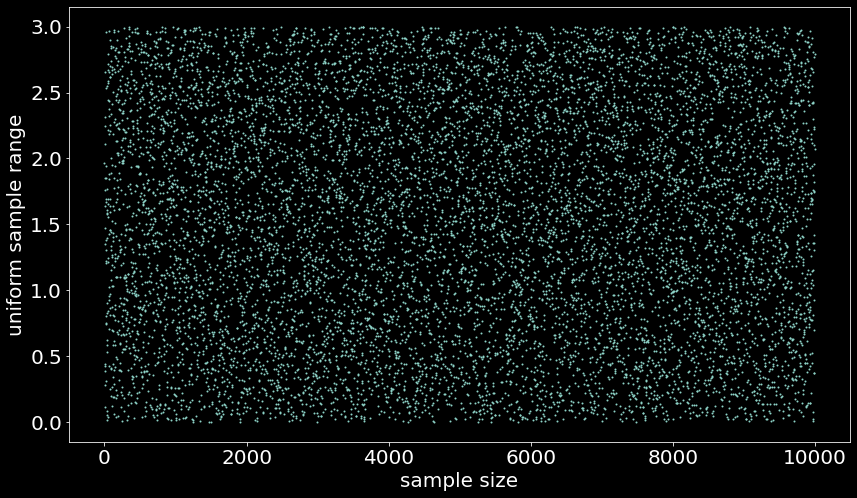

In [79]:
plt.plot(gamma_c, "o", ms=1)
plt.ylabel("uniform sample range"), plt.xlabel("sample size")

## Results from different runs, part b

(Text(0.5, 0, 'time steps'), Text(0, 0.5, 'quantity of the protein'))

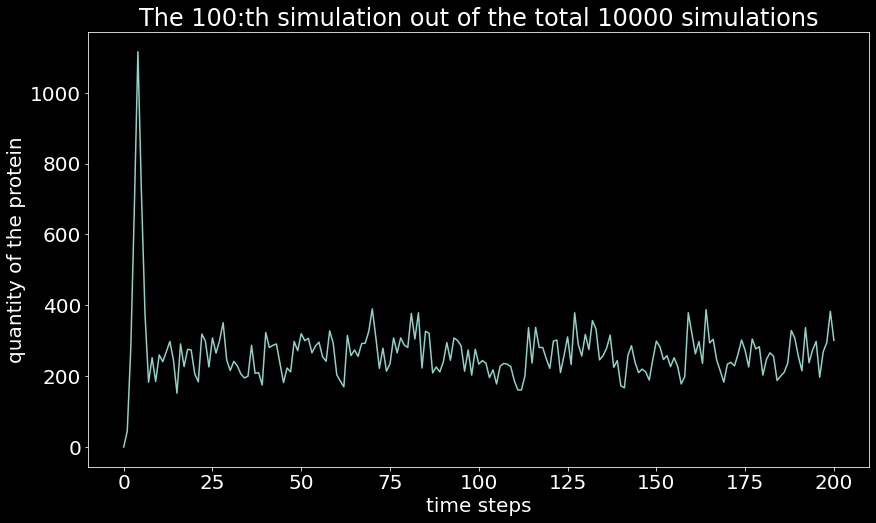

In [6]:
i = 100
plt.plot(X[i])
plt.title(f"The {i}:th simulation out of the total 10000 simulations")
plt.xlabel("time steps"), plt.ylabel("quantity of the protein")

In [78]:
print("condition number:", cond(theta.T @ theta).round(0)) 

condition number: 9906288.0


### WARNING: 
condition number is high, maybe use QR-factorization

# Solving for the parameters, part c

In [8]:
W_normal = inv(theta.T @ theta) @ theta.T @ X
Q, R = qr(theta, mode="reduced") 
Q.shape, R.shape, W_normal.shape

((9999, 15), (15, 15), (15, 201))

In [9]:
print("condition number with QR:", cond(R).round(0))

condition number with QR: 3147.0


Solving $\omega$ with QR-factorization

In [157]:
W_qr = solve(R, Q.T@X) 
assert np.allclose(W_qr, W_normal)
W_qr.shape

(15, 201)

In [159]:
W_pinv = pinv(theta)@X
assert np.allclose(W_pinv, W_normal)
W_pinv.shape

(15, 201)

## plotting the value dependencies of each parameter

Text(0, 0.5, 'magnitude of the parameters')

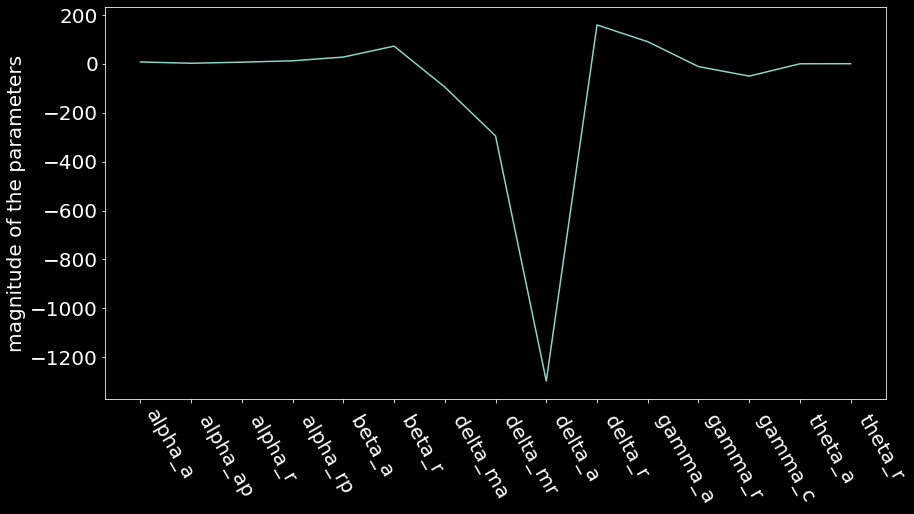

In [76]:
labels = "alpha_a, alpha_ap, alpha_r, alpha_rp, beta_a, beta_r, delta_ma, delta_mr, delta_a, delta_r, gamma_a, gamma_r, gamma_c, theta_a, theta_r"
parameter_labels = [word for word in labels.split(sep=",")]

fig, ax = plt.subplots(figsize=(14, 8))

j = np.random.choice(range(14)) # choose between 0 - 14
ax.plot(parameter_labels, W_qr[:,j]) 
fig.autofmt_xdate(rotation=-60, ha="left")
ax.set_ylabel("magnitude of the parameters")

## plotting the time evolution of each parameter

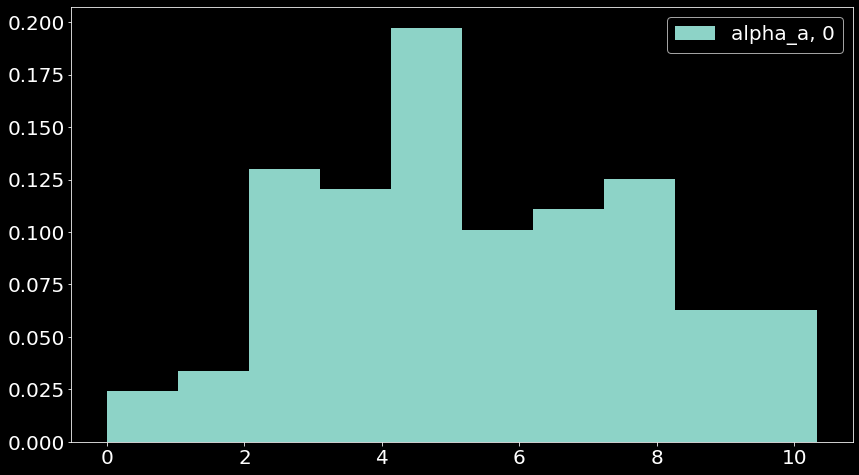

In [231]:
# choose an integer between 0 - 14
i = np.random.choice(range(14))
# plt.plot(W_qr[i], label=f"{parameter_labels[i]}, {i}") 
plt.hist(W_qr[i], density=True, label=f"{parameter_labels[i]}, {i}")

# # [plt.plot(W_qr[i], label=f"{parameter_labels[i]}, {i}") 
# #  for i in [0,1,2,3,4,5,6,7,10,11,12,13,14]
# # ] 
plt.legend()
# plt.xlabel("time steps"), plt.ylabel("magnitue of $W$")


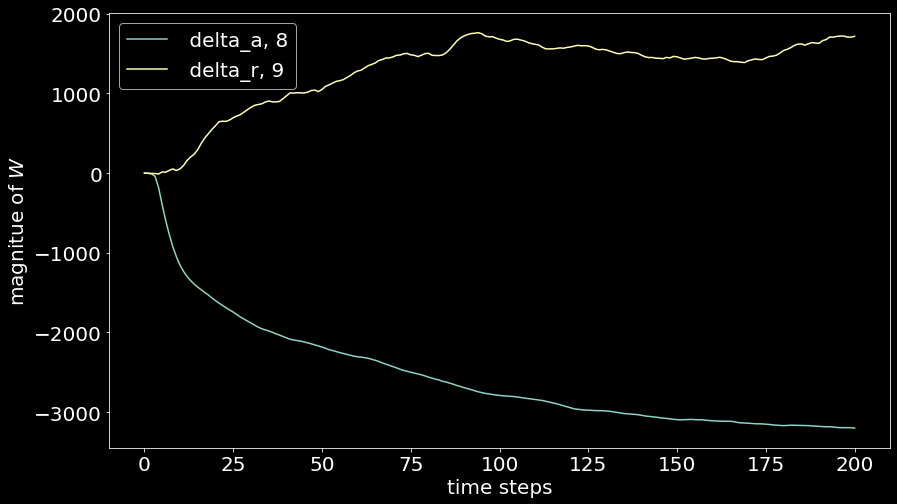

In [15]:
[plt.plot(W_qr[i], label=f"{parameter_labels[i]}, {i}") 
 for i in [8,9]
] 
plt.legend()
plt.xlabel("time steps"), plt.ylabel("magnitue of $W$");

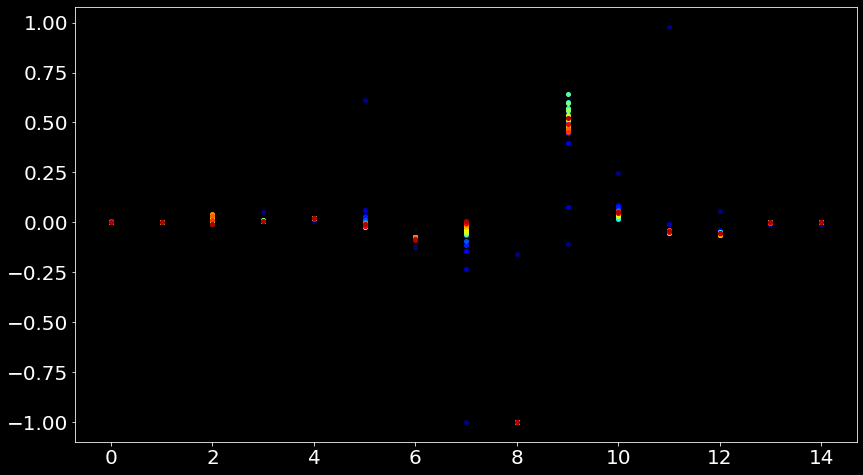

In [199]:
for i in range(1, 200, 10): 
    plt.plot(W_qr[:,i] / np.max(np.abs(W_qr[:,i]), axis=0), ".", color=jet(i/200), ms=8)

# Comparing the fit against the trainning data, part d

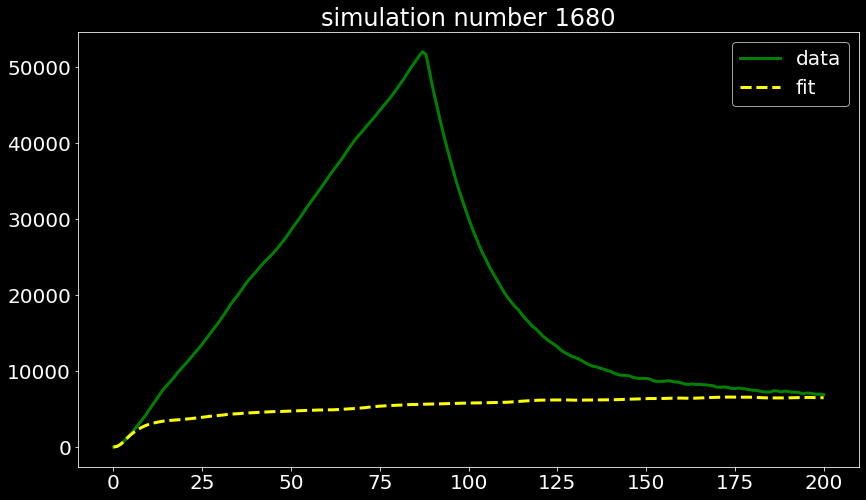

In [66]:
i = np.random.choice(range(10000))
plt.title(f"simulation number {i}")
plt.plot(X[i], label="data", color="green", lw=3)
plt.plot(theta[i]@W_qr, "--", color="yellow", lw=3, label="fit")
plt.legend();